In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


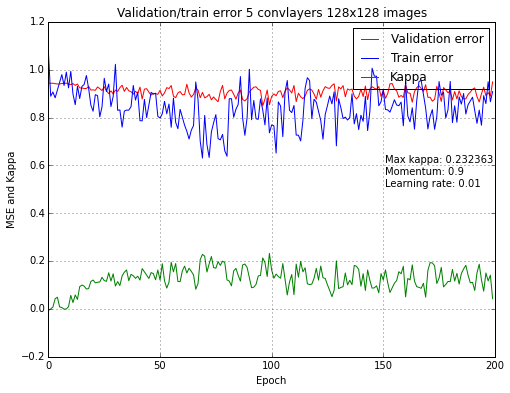

In [14]:
# first model

result = np.load("../data/tidy/5conv_2dense.npy")
epochs = np.arange(200)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 5 convlayers 128x128 images")
plt.text(151, 0.61,"Max kappa: %f" % result[2].max())
plt.text(151, 0.56, "Momentum: 0.9")
plt.text(151, 0.51, "Learning rate: 0.01")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

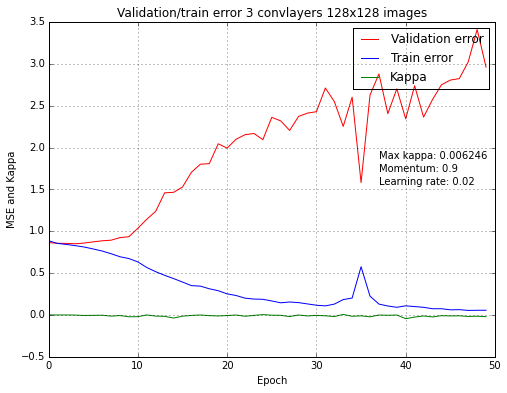

In [11]:
# first model

result = np.load("../data/tidy/3_conv_2dense_greep_class.npy")
epochs = np.arange(50)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(37, 1.86,"Max kappa: %f" % result[2].max())
plt.text(37, 1.71, "Momentum: 0.9")
plt.text(37, 1.56, "Learning rate: 0.02")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

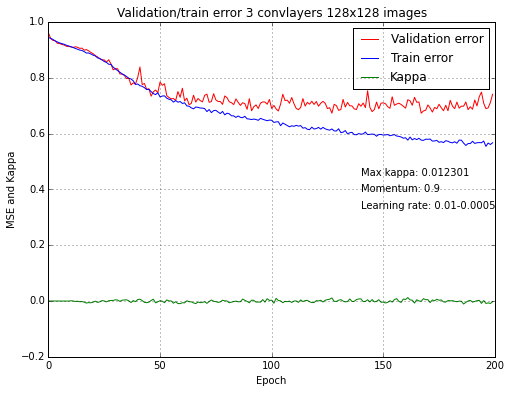

In [6]:
# first model

result = np.load("../data/tidy/3conv_2dense_reg.npy")
epochs = np.arange(200)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(140, .45,"Max kappa: %f" % result[2].max())
plt.text(140, .39, "Momentum: 0.9")
plt.text(140, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

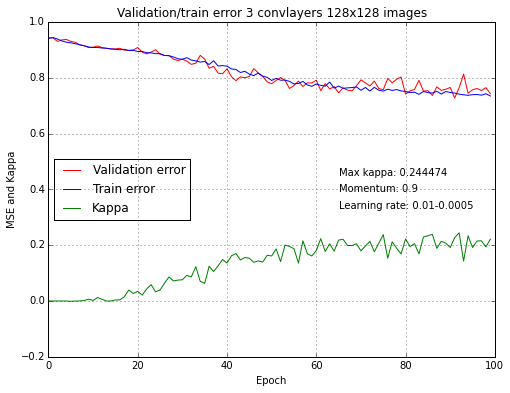

In [6]:
# first model

result = np.load("../data/tidy/3conv_2maxout/5conv_1dense.npy")
epochs = np.arange(100)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1], 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0], 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .45,"Max kappa: %f" % result[2].max())
plt.text(65, .39, "Momentum: 0.9")
plt.text(65, .33, "Learning rate: 0.01-0.0005")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend(loc="center left")
plt.grid()
plt.show()

In [13]:
conf_matrix = np.load("../data/tidy/3conv_2maxout/confusion.npy")
conf_matrix

array([[2218,   35,    4,    0,    0],
       [ 207,    6,    1,    0,    0],
       [ 392,   43,   21,    6,    1],
       [  36,   18,   17,    5,    0],
       [  31,   15,   13,    2,    1]])

In [108]:
def pretty_print_confusion(conf_matrix, labels):
    labels = tuple(labels)
    print("   |    %d |    %d |    %d |    %d |    %d |" % labels)
    print("---|------|------|------|------|------|")
    for i, lab in enumerate(labels):
        print(" %d | %4d | %4d | %4d | %4d | %4d |" % ((lab, ) + tuple(conf_matrix[i])))
        
        
def plot_confusion_matrix(conf_matrix, labels=(0, 1, 2, 3, 4), normalize=True, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = conf_matrix.astype('float', copy=True) / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(max(labels) + 1)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    x_offset = -.25
    y_offset = .08
    for y in xrange(cm.shape[0]):
        for x in xrange(cm.shape[1]):
            plt.text(x + x_offset, y + y_offset, "%.2f" % cm[y,x])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [109]:
pretty_print_confusion(conf_matrix, (0,1,2,3,4))

   |    0 |    1 |    2 |    3 |    4 |
---|------|------|------|------|------|
 0 | 2218 |   35 |    4 |    0 |    0 |
 1 |  207 |    6 |    1 |    0 |    0 |
 2 |  392 |   43 |   21 |    6 |    1 |
 3 |   36 |   18 |   17 |    5 |    0 |
 4 |   31 |   15 |   13 |    2 |    1 |


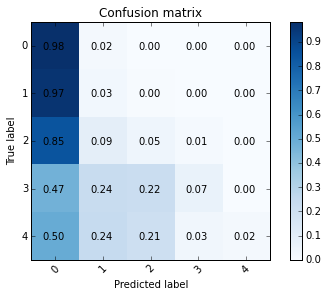

In [110]:
plot_confusion_matrix(conf_matrix)

In [49]:
%cd ../

/home/dudevil/prog/dmlabs/DRD


In [55]:
from visualizations import show_weights
from utils import load_network
import cPickle
import pandas as pd


In [57]:
worst_images = pd.read_csv("data/tidy/3conv_2maxout/imgs_error.csv")

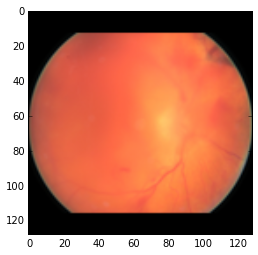

In [68]:
imshow(imread("data/train/resized/9419_left.png"))

In [64]:
labels = pd.read_csv("data/trainLabels.csv")

## Ordinal regression

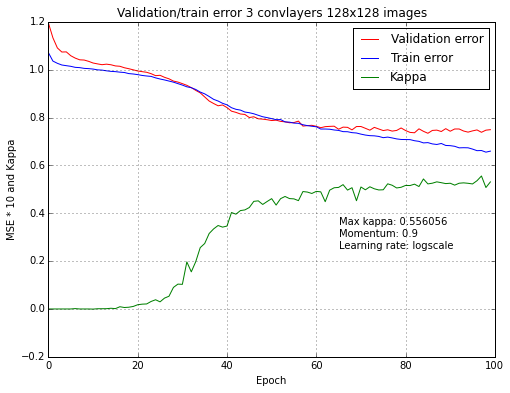

In [14]:
# first model

result = np.load("data/tidy/ordinal/training.npy")
epochs = np.arange(100)

figure(figsize=(8,6))
test_err = plt.plot(epochs, result[1] * 10, 'r', label="Validation error")
train_err =  plt.plot(epochs, result[0] * 10, 'b', label="Train error")
train_err =  plt.plot(epochs, result[2], 'g', label="Kappa")
plt.xlabel("Epoch")
plt.ylabel("MSE * 10 and Kappa")
plt.title("Validation/train error 3 convlayers 128x128 images")
plt.text(65, .35,"Max kappa: %f" % result[2].max())
plt.text(65, .3, "Momentum: 0.9")
plt.text(65, .25, "Learning rate: logscale")
#plt.axhline(BEST_VAL_ERROR, linestyle='--', color='g', label="Best-so-far")
plt.legend()
plt.grid()
plt.show()

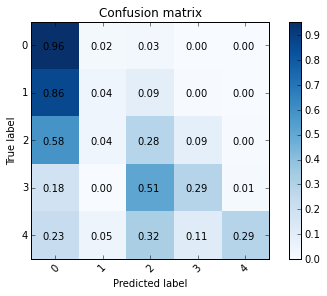

In [12]:
from visualizations import plot_confusion_matrix

plot_confusion_matrix(np.load("data/tidy/ordinal/confusion.npy"))